In [1]:
!git clone https://github.com/humanoid-purdue/prairie-drl


Cloning into 'prairie-drl'...
remote: Enumerating objects: 1030, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 1030 (delta 28), reused 32 (delta 12), pack-reused 981 (from 2)
Receiving objects: 100% (1030/1030), 34.36 MiB | 16.59 MiB/s, done.
Resolving deltas: 100% (670/670), done.


In [2]:
%cd prairie-drl

/content/prairie-drl


In [3]:
!pip install mediapy
!pip install jax
!pip install mujoco
!pip install brax
!pip install flax
!pip install dill
!pip install mediapy
!pip install mujoco_mjx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 116.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.8/704.8 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.5 MB/s eta 0:00:00


In [6]:
!git reset --hard HEAD
!git pull origin main

HEAD is now at 6cdaf50 leg tracking
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 286 bytes | 286.00 KiB/s, done.
From https://github.com/humanoid-purdue/prairie-drl
 * branch            foot-plan  -> FETCH_HEAD
   6cdaf50..1aebd68  foot-plan  -> origin/foot-plan
Updating 6cdaf50..1aebd68
Fast-forward
 unitree_env_pd.py | 7 +++----
 1 file changed, 3 insertions(+), 4 deletions(-)


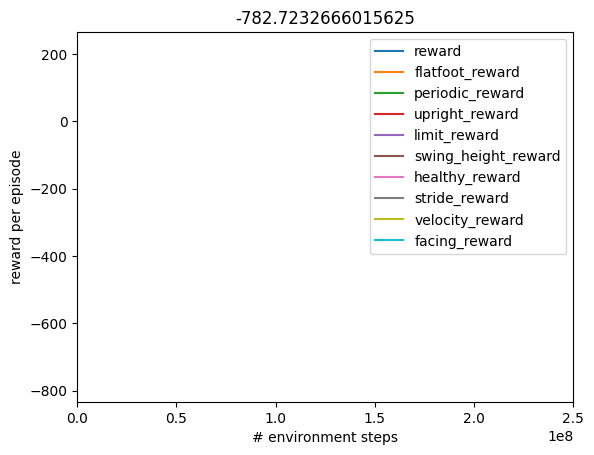

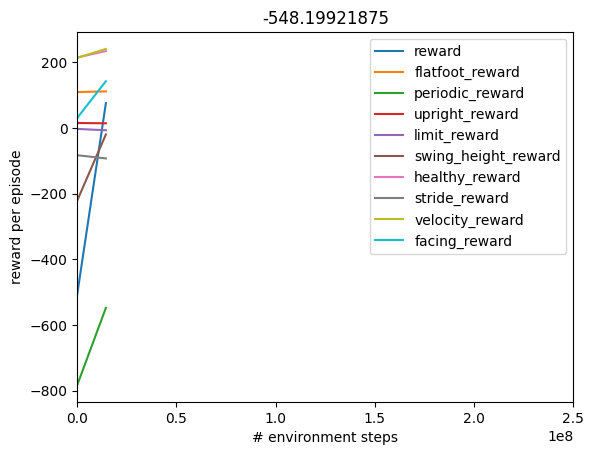

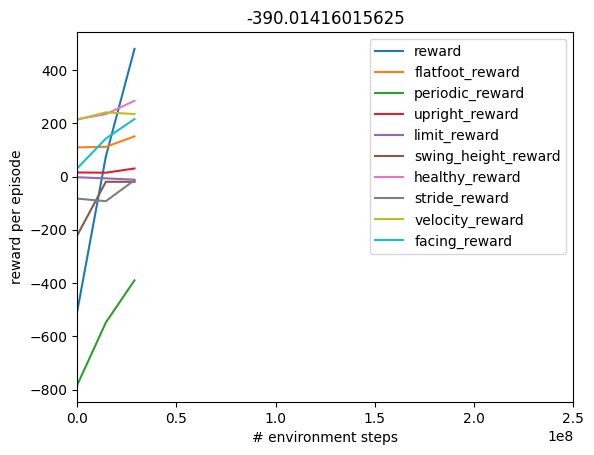

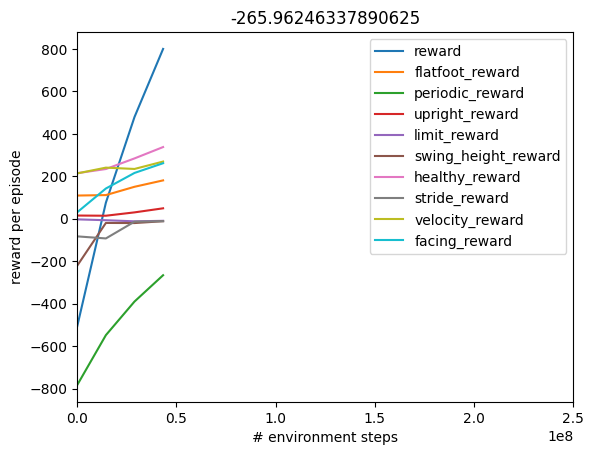

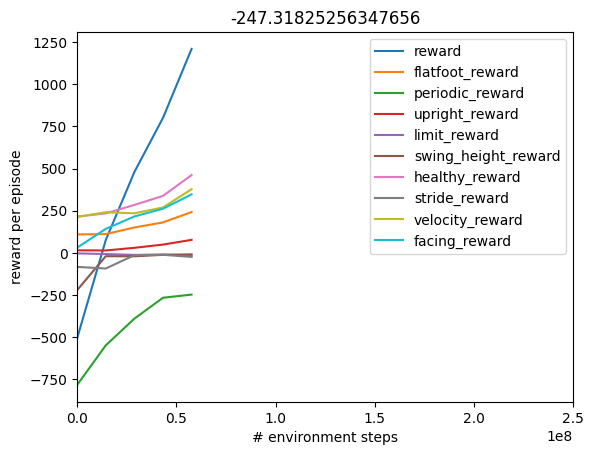

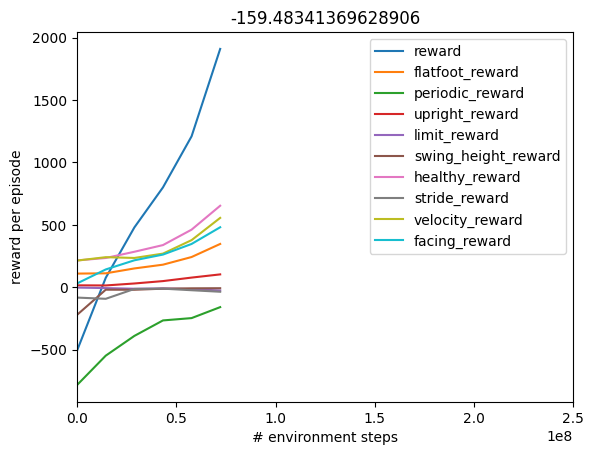

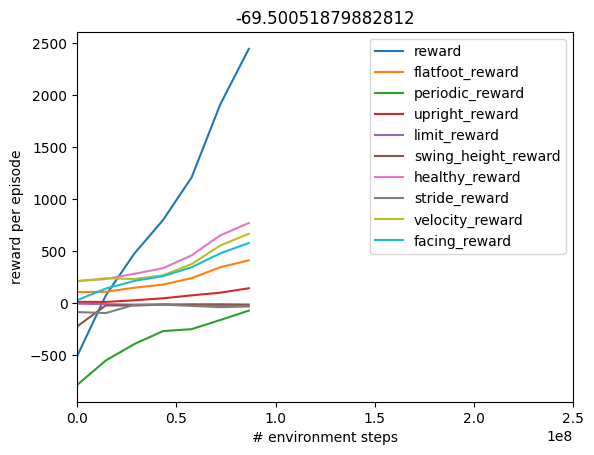

In [ ]:
import train
import dill
make_inference_fn, params, _= train.train_fn(environment=train.env,
                                       progress_fn=train.progress,
                                       eval_env=train.eval_env)

train.model.save_params("walk_policy", params)

with open("inference_fn", 'wb') as f:
    dill.dump(make_inference_fn, f)

In [4]:
import test
from IPython.display import HTML
from brax.io import html
env, rollout = test.makeRollout()
HTML(html.render(env.sys.tree_replace({'opt.timestep': env.dt}), rollout))